In [2]:
# Use the dicts generated by create_dicts.py

import numpy as np
import os
import json
from functions import *
import statistics as stat
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import seaborn as sns
from statsmodels.nonparametric.kernel_density import KDEMultivariate
import matplotlib.tri as tri
import cv2
import statistics as stats
from tqdm import tqdm
import pandas as pd
import scipy
import scipy.stats as st
from sklearn.datasets import make_blobs
from scipy.optimize import minimize
import seaborn as sns
from sklearn.metrics import mean_absolute_error as MAE
from skopt.plots import plot_convergence, plot_objective
from scipy.ndimage import gaussian_filter
# import jax
# import jax.numpy as jnp

%run functions.py

%matplotlib inline


from tqdm import tqdm
#import create_dicts
# ------- my personal graphing style --------------------

#plt.style.use('ggplot')

# golden_mean = (np.sqrt(5)-1.0)/2.0 # Aesthetic ratio
# fig_width = 8. # Width in inches
# fig_height = 1.1*fig_width*golden_mean # Height in inches
# fig_size = [fig_width,fig_height] # Figure size
# params = {'backend': 'pdf',
# 'legend.fontsize': 14,
# 'xtick.labelsize' : 14,
# 'ytick.labelsize' : 14,
# 'axes.labelsize' : 16,
# 'figure.figsize': fig_size}
# plt.rcParams.update(params)
# rc("font", **{"size": 10, "family": "serif", "serif": ["Computer Modern"]})
# rc("text", usetex=True)
# # -------------------------------------------------------

golden_mean = (np.sqrt(5)-1.0)/2.0 # Aesthetic ratio
fig_width = 8. # Width in inches
fig_height = 1.1*fig_width*golden_mean # Height in inches
fig_size = [fig_width,fig_height] # Figure size
params = {'backend': 'pdf',
'legend.fontsize': 14,
'xtick.labelsize' : 14,
'ytick.labelsize' : 14,
'axes.labelsize' : 16,
'figure.figsize': fig_size}
plt.rcParams.update(params)
rc("font", **{"size": 10, "family": "serif", "serif": ["Computer Modern"]})
rc("text", usetex=True)
# -------------------------------------------------------

In [2]:
%run functions.py



In [18]:
objective_func([5,0.00000001])

25.21052631578947

In [66]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from skopt import gp_minimize
from skopt.space import Real, Integer

# Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Define the objective function to be optimized


# Define the search space for the hyperparameters
space = [Real(-5, 25, name='upper'),
         Real(-5, 25, name='lower')]

# Run the Bayesian optimization
result = gp_minimize(objective_func, space, n_calls=150, random_state=0)

# Print the optimal set of hyperparameters and the corresponding cross-validation score
print("Optimal Hyperparameters: ", result.x)
print("Cross-Validation Score: ", result.fun)



Optimal Hyperparameters:  [5.268425672504016, 0.00955154041911932]
Cross-Validation Score:  25.27368421052632


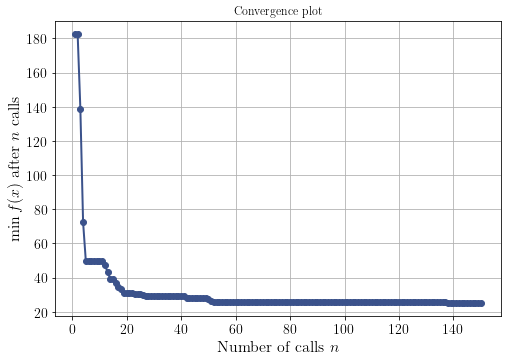

In [67]:
fig2  = plot_convergence(result)
plt.savefig('convergence.png', facecolor='white', edgecolor='none',bbox_inches = 'tight')

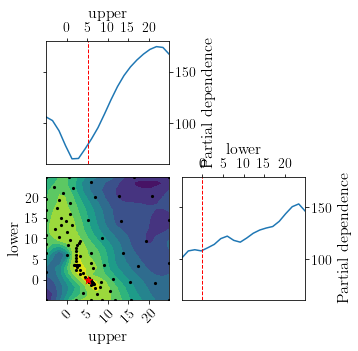

In [68]:
fig  = plot_objective(result, dimensions=['upper', 'lower'], n_points=20)
# Save the plot to a file


plt.savefig('hyperparameters4.png', facecolor='white', edgecolor='none',bbox_inches = 'tight')



# Visualizing the Objective Function

In [23]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)



X, Y = np.meshgrid(x, y)



# Evaluate the objective function on the grid
Z = objective_func([X, Y])

ValueError: operands could not be broadcast together with shapes (10000,) (17,) 

# JAX Optimization

In [ ]:




# Define the gradient of the objective function
gradient = np.gradient(objective_func)

# Define the initial guess
x0 = jnp.array([5, 2])

# Call the optimization routine
result = jnp.scipy.optimize.minimize(objective_func, x0, method='BFGS', jac=gradient)

# Print the results
print("Optimal value of x: ", result.x)
print("Optimal value of the objective function: ", result.fun)


# Gradient Based Optimization

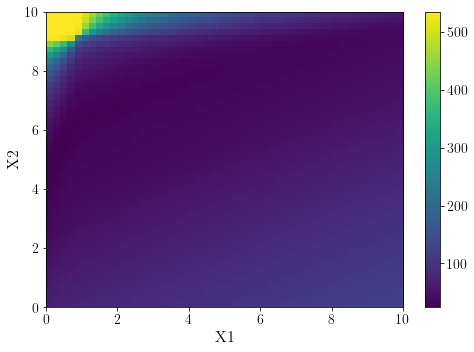

In [59]:
%run functions.py
x1_range = np.linspace(0.0000001, 10, 50)
x2_range = np.linspace(0.0000001, 10, 50)

# initialize a 2D array to store the values of the objective function
z = np.zeros((len(x1_range), len(x2_range)))

# compute the objective function for each pair of X1 and X2 values
for i in range(len(x1_range)):
    for j in range(len(x2_range)):
        x = [x1_range[i], x2_range[j]]
        z[i,j] = objective_function(x)

# create a 2D plot of the objective function values
plt.imshow(z, extent=[0,10,0,10], cmap='viridis', aspect='auto')
plt.colorbar()
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

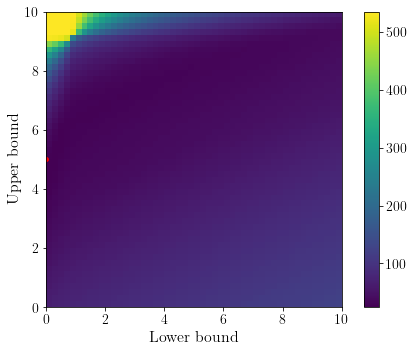

In [34]:
z = np.load('z_data.npy')
x1_range = np.linspace(0.0000001, 10, 50)
x2_range = np.linspace(0.0000001, 10, 50)


x1_0 =  x1_range[0]
x1_1 =  x1_range[1]
x2_0 =  x2_range[0]
x2_1 =  x2_range[1]

plt.imshow(z, extent=[0,10,0,10], cmap='viridis', aspect='equal')
plt.colorbar()
x1_low = (x1_range[np.argwhere(z == np.min(z))[0][0]])
x2_low = (x2_range[np.argwhere(z == np.min(z))[0][1]])


plt.xlabel('Lower bound')
plt.ylabel('Upper bound')
plt.scatter([0.001], [5], color="red", s=15) # plotting single point
plt.savefig("density_normalization.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [60]:
np.save("z_data.npy",z)

In [7]:
x1_range = np.linspace(0.0000001, 10, 50)
x2_range = np.linspace(0.0000001, 10, 50)


print(x1_range[np.argwhere(z == np.min(z))[0][0]])
print(x2_range[np.argwhere(z == np.min(z))[0][1]])

4.897959234693878
0.2040817306122449


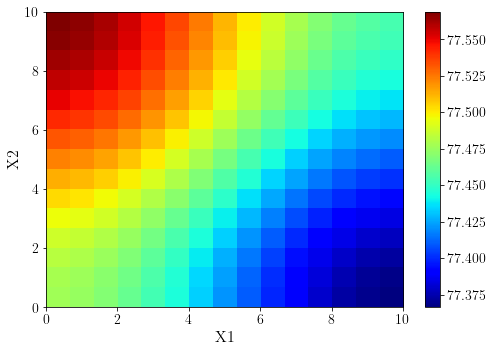

In [55]:
smoothed_matrix = gaussian_filter(z, sigma=5)
plt.imshow(z, extent=[0,10,0,10], cmap='jet', aspect='auto')
plt.colorbar()
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [42]:
plt.savefig("objective_func.pdf", format="pdf", bbox_inches="tight")

In [28]:
plt.savefig('objective_func.png', facecolor='white', edgecolor='none',bbox_inches = 'tight')

In [21]:
gradient = np.gradient(objective_func)

# Define the initial guess
x0 = [5, 0.00001]

# Call the optimization routine
result = scipy.optimize.minimize(objective_func, x0, method='Powell', jac=gradient)
print("Optimal Hyperparameters: ", result.x)
print("Cross-Validation Score: ", result.fun)

KeyboardInterrupt: 

In [22]:
print("Optimal Hyperparameters: ", result.x)
print("Cross-Validation Score: ", result.fun)

Optimal Hyperparameters:  [5.e+00 1.e-05]
Cross-Validation Score:  25.21052631578947


# Testing Site

# OLD

In [ ]:
path = r"C:\Users\USER\OneDrive - Stellenbosch University\Masters\Thesis\virtual_envs\coldb_files\four_models\Cascade R-CNN_V3"

# Counting threshold
#threshold = 0.95
scale_dict = {}
scale_error_mean = np.array([])
#threshold = 0.78#np.linspace(1,4,10)
#custome_bw = np.array([200,  200])



# Inputs
def LDTS(threshold=0.78, path, norm_bounds=np.array[2.14,5.87]): 
    ''' Args:
            threshold::[float]
                Counting threshold value - this value is scaled according to the density

            path::[str]
                This the the path to the video data - where each video is a directory containing multiple frames
                
            norm_bounds::[np.array]
                2D array containing the normalization bounds 
        
        Returns:


    '''

    # Variable to optimize 
    tmin = norm_bounds[0]
    tmax = norm_bounds[1]
    frame_num = 1
    #threshold = 0.78

    # Dictionary to store results (error, count etc) for each video


    
    average_prob_errors_LDPS = []
    average_prob_errors_bl = []
   

    # loop through each video
    for video in tqdm(os.listdir(path)):

        videos_path = os.path.join(path,video)
        if video not in ["Altitude_videos","Circle_vid","dicts","val",'DJI_0830-522']:

            # define a list for all the counts made in a video - the average of this count is the final video count
            video_counts =[]
            video_counts_stats = []
            video_counts_skl = []

            # Create name for txt
            gt = int(video.split("-")[1])
            # Try to remove space before gt (( eg: DJI_0808 -" "1200))
            try:
                gt = int(gt.split(" ")[1])

            except: 
                # Does nothing
                hold = 1

            # Declare limit vairable for to limit the number of frames used per video     
            limit = 0

            # Get ALL results for the current txt
            for frame in os.listdir(videos_path):

                # lists for each frame
                x_data = np.array([])
                y_data = np.array([])
                p_data = np.array([])
                p_scaled = np.array([])

                # only use X frames in video
                if limit < frame_num:

                    # Reset the count for each frame
                    count = 0
                    count_stats = 0
                    count_skl = 0

                    p_scaled_stats = np.array([])
                    p_scaled_skl = np.array([])

                    # Join path
                    frame_path = os.path.join(videos_path,frame)

                    results = get_results(frame_path)
                    last = len(results)

                    # generate data for KDE mode
                    for i in range(int(last/5)):
                        # get the first five elements in results
                        five = list(results[0:5])

                        # Calculate centers of BB
                        xt = int(five[0])
                        yt = int(five[1])
                        xb = int(five[2])
                        yb = int(five[3])
                        xcp = int((xb+xt)/2)
                        ycp = int((yb+yt)/2)


                        prob = five[4]

                        if prob < 1:
                            # ignores detections with probabilities less that 0.05 (5%)
                            if prob  > 0.05:
                                p_data = np.append(p_data,prob)
                                x_data = np.append(x_data,xcp)
                                y_data = np.append(y_data,ycp)


                        # removing the first 5 elements - (their data have been captured) 
                        for y in [1,2,3,4,5]:
                            results.pop(0)

                    # Generate KDE model from data
                    # try:
                    #     # Statsmodels 
                    model = KDEMultivariate([x_data, y_data], 'cc', bw=np.array([250,250]))
                    
                    # Sklearn 
                    # values = np.vstack([x_data, y_data])
                    # model_skl = st.gaussian_kde(values, bw_method = 'silverman') 
                    
                    # except:
                    #     print("Not enough data for video " + video)
                        
                    # Generate Z data for each frame
                    z_data = model.pdf([x_data,y_data])
                    # z_data_skl = model_skl.pdf([x_data,y_data])

                    # normalize Z ( ensure that z falls between 0-1 and have the same datum)
                    z_norm = (tmax-tmin)*(z_data - min_z)/(max_z-min_z) + tmin
                    #z_norm = normalize_DRB(z_data)
                    #z_norm_skl = normalize_skl(z_data_skl)
                    
                    # STATS --------------------
                    #Scale P_data - only scale p if z_norm is greater than a specified value
                    for i in range(len(z_norm)):
                        if z_norm[i] >= 0 and gt > 200: 
                            p_scaled_stats = np.append(p_scaled_stats,(p_data[i]*z_norm[i]))
                        else:
                            p_scaled_stats = np.append(p_scaled_stats,p_data[i])

                    #p_scaled = p_data + z_norm*1.05263158
                    # get count for each frame using density information
                    for i in p_scaled_stats:
                        if i >= threshold:
                            count_stats +=1
                    
                    video_counts_stats.append(count_stats)

                    for i in p_scaled_skl:
                        if i >= threshold:
                            count_skl +=1
                    
                    video_counts_skl.append(count_skl)

                    # No density - baseline 
                    for i in p_data:
                        if i >= threshold:
                            count +=1
                    
                    video_counts.append(count)

                    # increment the number of frames limit
                    limit += 1

            # Calculate the average of all frame counts
            video_average = stats.mean(video_counts)
            video_average_stats = stats.mean(video_counts_stats)
            base_line_counts.append(video_average)
            LDPS_counts.append(video_average_stats)

            # Calculate the error for each video
            error = abs(gt - video_average)#/gt
            error_stats = abs(gt - video_average_stats)#/gt

            # Append error of current video to all video errors
            video_errors_baseline.append(error)
            video_errors_LDPS.append(error_stats)
            ground_truths.append(gt)

        
    return average_prob_errors_bl,average_prob_errors_LDPS,probs

print("DONE")

bl_errors, LDPS_errors, probs = LDTS()